In [1]:
import os,time,sys,datetime,math
import numpy as np
import pandas as pd
from scipy.io import arff

root = '/Users/xindu/OneDrive/Data/UCI/Confemm/helena/'
filename = 'helena.arff'

path = os.path.join(root, filename)
data, meta = arff.loadarff(path)
# df = pd.read_csv(path,sep=';')
df = pd.DataFrame(data)
N_d = df.shape[0]
print(N_d)

print(df.columns)
print(df.isna().sum())
print(df.head())

65196
Index(['class', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27'],
      dtype='object')
class    0
V1       0
V2       0
V3       0
V4       0
V5       0
V6       0
V7       0
V8       0
V9       0
V10      0
V11      0
V12      0
V13      0
V14      0
V15      0
V16      0
V17      0
V18      0
V19      0
V20      0
V21      0
V22      0
V23      0
V24      0
V25      0
V26      0
V27      0
dtype: int64
   class        V1        V2        V3        V4        V5        V6  \
0  b'41'  0.005521  0.080556  0.110417  0.490822  0.586406  0.066414   
1  b'92'  0.049398  0.147917  0.541667  0.542865  0.515608  0.105128   
2  b'24'  0.548663  1.000000  1.000000  0.397029  0.627398  1.023440   
3  b'29'  0.023073  0.206250  0.238889  0.622998  0.764067  0.202599   
4  b'91'  0.224427  0.433333  0.902083  0.814199  0.576879  0.344413   

       

In [2]:
df['class'] = df['class'].astype('str')
df['target'] = df['class'].str.extract(r'(\d+)')
df['target'] = df['target'].astype(np.int64)
print(df.head())

  class        V1        V2        V3        V4        V5        V6        V7  \
0    41  0.005521  0.080556  0.110417  0.490822  0.586406  0.066414  0.092206   
1    92  0.049398  0.147917  0.541667  0.542865  0.515608  0.105128  0.475550   
2    24  0.548663  1.000000  1.000000  0.397029  0.627398  1.023440  1.004220   
3    29  0.023073  0.206250  0.238889  0.622998  0.764067  0.202599  0.177892   
4    91  0.224427  0.433333  0.902083  0.814199  0.576879  0.344413  0.822975   

         V8        V9  ...      V19       V20        V21       V22       V23  \
0  0.116352  0.379310  ...  78.6894  17.23780  21.504200  14.43730  17.37800   
1  0.049555  0.383460  ...  59.7879   5.39341   3.819610  11.49240   3.92947   
2  0.027381  0.451337  ...  58.1429  -3.36598  -0.037489  10.63470   2.66018   
3  0.071232  0.531712  ...  55.4798  -1.05109  -4.755360  13.36710   2.85206   
4  0.026121  0.425875  ...  76.8475 -19.37170  32.270700   9.41442   4.34345   

       V24       V25       V26  

In [3]:
from sklearn.model_selection import train_test_split

Train = df.sample(frac=0.9)
Test = df.drop(Train.index)

# X = df.values[:,:-1].astype(np.float32)
# print(X.shape)
# y = df.values[:,-1].astype(np.int64)
# print(y.shape)

# X_train, X_test, Y_train, Y_test = train_test_split(X, y, random_state=0)
X_train = Train.values[:,1:-1].astype(np.float32)
X_test = Test.values[:,1:-1].astype(np.float32)
Y_train = Train.values[:,-1].astype(np.int64)
Y_test = Test.values[:,-1].astype(np.int64)

print(X_train.shape)
print(Y_test.shape)

(58676, 27)
(6520,)


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier

cls = GradientBoostingClassifier(random_state=0)
cls.fit(X_test, Y_test)
score = cls.score(X_test, Y_test)
print(score)

(array([434., 520., 522., 672., 638., 785., 593., 969., 531., 856.]),
 array([ 0. ,  9.9, 19.8, 29.7, 39.6, 49.5, 59.4, 69.3, 79.2, 89.1, 99. ]),
 <BarContainer object of 10 artists>)

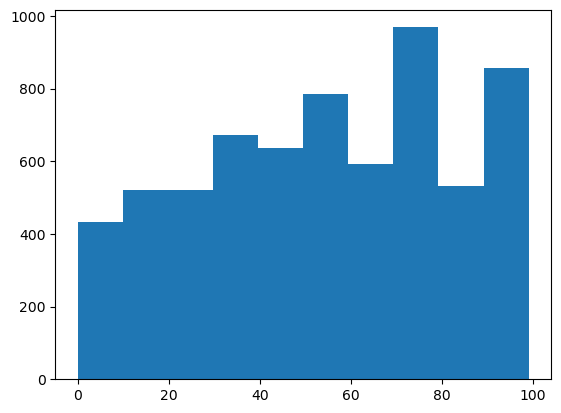

In [4]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1)
# ax.fill_between(I, 0, probs)
ax.hist(Y_test)

In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch import Tensor

class Classifier(nn.Module):
    def __init__(self, infea:int=27, hidden:int=200, out:int=100, *args, **kwargs):
        super(Classifier, self).__init__(*args, **kwargs)
        self.infea = infea
        self.hidden = hidden
        self.out = out
        self.encoder = nn.Sequential(
            nn.Linear(infea, hidden),
            nn.BatchNorm1d(hidden),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(hidden, hidden*2),
            nn.BatchNorm1d(hidden*2),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(hidden*2, hidden*4),
            nn.BatchNorm1d(hidden*4),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(hidden*4, hidden*4),
            nn.BatchNorm1d(hidden*4),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(hidden*4, hidden*4),
            nn.BatchNorm1d(hidden*4),
            nn.ReLU(),
            nn.Dropout(0.5),
        )
        self.final = nn.Linear(hidden*4, out)

    def forward(self, x: Tensor):
        h = self.encoder(x)
        logits = self.final(h)
        return logits

In [6]:
import copy
from torch.optim import Adam, SGD
from torch.optim.lr_scheduler import ExponentialLR, ReduceLROnPlateau
from typing import Any, Optional, OrderedDict, List
from collections import defaultdict

def train(dataset: Optional[dict], model: nn.Module, optimizer: Optional[Any], scheduler: Optional[Any],
          epoch: int=100, batch_size: int=32, device: str='cpu'):
    trainloss = defaultdict(list)
    testloss = defaultdict(list)

    X_train, X_test, y_train, y_test = dataset['train_x'], dataset['test_x'], dataset['train_y'], dataset['test_y']
    
    since = time.time()
    best_model_wts = copy.deepcopy(model.state_dict())

    for epoch in range(epoch):
        print("epoch: " + str(epoch) + '===================================================')
        n_train = X_train.shape[0]
        n_test = X_test.shape[0]
        if epoch == 0:
            print(f'train length: {n_train}, test length: {n_test}')

        I = list(range(0, n_train))
        
        running_loss = 0.0
        running_test_loss = 0.0
        running_corrects = 0
        running_test_corrects = 0

        model.train()
        for i_batch in range(n_train // batch_size):
            if i_batch < (n_train // batch_size - 1):
                I_b = I[i_batch * batch_size:(i_batch+1) * batch_size]
            else:
                I_b = I[i_batch * batch_size:]
            x_batch = X_train[I_b, :]
            y_batch = y_train[I_b]

            x_batch = torch.from_numpy(x_batch).to(torch.float32).to(device)
            y_batch = torch.from_numpy(y_batch).to(torch.int64).to(device)

            # print(y_batch)

            with torch.set_grad_enabled(True):
                logits = model(x_batch)
                loss = torch.nn.functional.cross_entropy(logits, y_batch)
                _, preds = torch.max(logits, 1)
                corrects = torch.sum(preds == y_batch.data)
                
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()
                trainloss['loss'].append(loss.item())
                running_loss += loss.item() * x_batch.size(0)
                running_corrects +=  corrects.item()
                acc = corrects.item()*1.0/x_batch.size(0)
                trainloss['running acc'].append(acc)

            if i_batch > 0 and i_batch % 50 == 0:
                print(f'ibatch: {i_batch}, train loss: {loss}, train acc: {acc}.')
        
        epoch_loss = running_loss / n_train
        epoch_acc = running_corrects * 1.0 / n_train
        
        trainloss['epoch'].append(epoch_loss)
        trainloss['epoch_acc'].append(epoch_acc)

        I = list(range(0, n_test))
        model.eval()
        for i_batch in range(n_test // batch_size):
            if i_batch < (n_test // batch_size - 1):
                I_b = I[i_batch * batch_size:(i_batch+1) * batch_size]
            else:
                I_b = I[i_batch * batch_size:]
            x_batch = X_test[I_b, :]
            y_batch = y_test[I_b]

            x_batch = torch.from_numpy(x_batch).to(torch.float32).to(device)
            y_batch = torch.from_numpy(y_batch).to(torch.int64).to(device)

            with torch.set_grad_enabled(False):
                logits = model(x_batch)
                loss = torch.nn.functional.cross_entropy(logits, y_batch)
                _, preds = torch.max(logits, 1)
                corrects = torch.sum(preds == y_batch.data)
                
                testloss['loss'].append(loss.item())
                running_test_loss += loss.item()*x_batch.size(0)
                running_test_corrects += corrects.item()
                acc = corrects.item() * 1.0 / x_batch.size(0)
                testloss['acc'].append(acc)
                
        epoch_test_loss = running_test_loss / n_test
        epoch_acc = running_test_corrects * 1.0 / n_test
                
        testloss['epoch'].append(epoch_test_loss)
        testloss['epoch_acc'].append(epoch_acc)

        print(f'test loss: {epoch_test_loss}, test acc: {epoch_acc}.')

    time_elapsed = time.time() - since
    print(("Training complete in %sm %ss" % (time_elapsed // 60, time_elapsed % 60)))

    torch.save({
        'epoch': epoch,
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
    #         'scheduler_state_dict': scheduler.state_dict(),
        'trainloss': trainloss,
        'testloss': testloss,
        }, 'model_final')
    return model, trainloss, testloss

In [7]:
device = 'cpu'

datasets = dict()
datasets['train_x'] = X_train
datasets['test_x'] = X_test
datasets['train_y'] = Y_train
datasets['test_y'] = Y_test

model = Classifier().to(device)

optimizer = Adam(model.parameters(), lr=0.01, weight_decay=0.0001)
scheduler = ExponentialLR(optimizer, gamma=0.9)

model, trainloss, valloss = train(dataset=datasets, model=model, optimizer=optimizer, 
                                  scheduler=scheduler, epoch=50, batch_size=1024)

epoch: 0===================================================
train length: 58676, test length: 6520
ibatch: 50, train loss: 3.4798662662506104, train acc: 0.2001953125.
test loss: 3.342042150087883, test acc: 0.2263803680981595.
epoch: 1===================================================
ibatch: 50, train loss: 3.352466583251953, train acc: 0.2236328125.
test loss: 3.209652402795897, test acc: 0.24432515337423313.
epoch: 2===================================================
ibatch: 50, train loss: 3.2864253520965576, train acc: 0.220703125.
test loss: 3.193009131671461, test acc: 0.24585889570552147.
epoch: 3===================================================
ibatch: 50, train loss: 3.289241075515747, train acc: 0.2265625.
test loss: 3.1869219771192117, test acc: 0.24938650306748467.
epoch: 4===================================================
ibatch: 50, train loss: 3.2811079025268555, train acc: 0.2314453125.
test loss: 3.1403475348934804, test acc: 0.26380368098159507.
epoch: 5========

tensor([[0.9993, 0.9999, 1.0000,  ..., 0.9978, 0.9991, 0.9994],
        [0.9944, 0.9997, 0.9999,  ..., 0.9965, 0.9792, 0.9948],
        [0.9967, 0.9847, 0.9958,  ..., 0.8513, 0.9959, 0.9941],
        ...,
        [0.9954, 0.9984, 0.9996,  ..., 0.9945, 0.9890, 0.9898],
        [0.9985, 0.9987, 0.9997,  ..., 0.9973, 0.9998, 0.9996],
        [0.9941, 0.9945, 0.9971,  ..., 0.9284, 0.9920, 0.9825]],
       grad_fn=<RsubBackward1>)
6520


(array([ 234.,  113.,   94.,  117.,  141.,  163.,  405.,  518.,  711.,
        4024.]),
 array([3.40342522e-04, 1.00306010e-01, 2.00271678e-01, 3.00237346e-01,
        4.00203013e-01, 5.00168681e-01, 6.00134349e-01, 7.00100017e-01,
        8.00065684e-01, 9.00031352e-01, 9.99997020e-01]),
 <BarContainer object of 10 artists>)

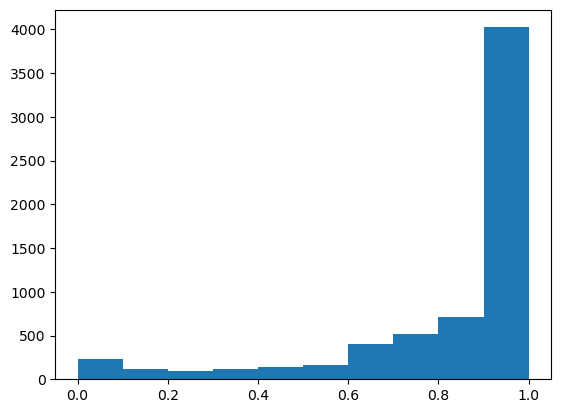

In [8]:
x_test = torch.from_numpy(X_test).to(torch.float32).to(device)
y_test = torch.from_numpy(Y_test).to(torch.int64).to(device)

x_train = torch.from_numpy(X_train).to(torch.float32).to(device)
y_train = torch.from_numpy(Y_train).to(torch.int64).to(device)

sfs = 1-model(x_test).softmax(dim=1)
print(sfs)
scores = []
for i in range(sfs.shape[0]):
    scores.append(sfs[i][y_test[i]].item())

print(len(scores))
fig, ax = plt.subplots(1, 1)
# ax.fill_between(I, 0, probs)
ax.hist(scores, density=False)

In [9]:
alpha = 0.1
n = len(scores)
qalpha = np.ceil((n+1)*(1-alpha))/n
print(qalpha)
qhat = torch.quantile(torch.tensor(np.array(scores)), torch.tensor(qalpha))
print(qhat)

0.9001533742331288
tensor(0.9954, dtype=torch.float64)


6520
avg cov: 0.900060
avg cov: 0.898908


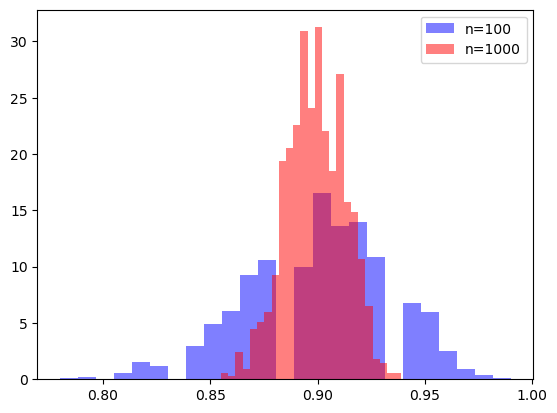

In [10]:
R = 1000
print(n)
alpha=0.1
scores_ = torch.tensor(scores)
coverages = torch.zeros((R,))
for r in range(R):
    scores__ = scores_[torch.randperm(6520)]
    calib_scores, val_scores = (scores__[:1000], scores__[6420:])
    qhat_ = torch.quantile(calib_scores, np.ceil((n+1)*(1-alpha))/n)
    coverages[r] = (val_scores <= qhat_).float().mean()
average_coverage = coverages.mean()
print('avg cov: %f' % average_coverage)

coverages2 = torch.zeros((R,))
for r in range(R):
    scores__ = scores_[torch.randperm(6520)]
    calib_scores, val_scores = (scores__[:1000], scores__[5520:])
    # print(calib_scores.mean())
    qalpha = np.ceil((n+1)*(1-alpha))/n
    # print(qalpha)
    qhat_ = torch.quantile(calib_scores, qalpha)
    # print(qhat_)
    coverages2[r] = (val_scores <= qhat_).float().mean()
average_coverage = coverages2.mean()
print('avg cov: %f' % average_coverage)
plt.hist(coverages,bins=25,density=True,label='n=100', color='blue', alpha=0.5)
plt.hist(coverages2,bins=25,density=True,label='n=1000', color='red', alpha=0.5)
plt.legend()

tensor([0.0041, 0.0020, 0.0012, 0.0012, 0.0008, 0.0016, 0.0372, 0.0030, 0.0015,
        0.0035, 0.0020, 0.0039, 0.0027, 0.0011, 0.0062, 0.0068, 0.0042, 0.0792,
        0.0045, 0.0018, 0.0021, 0.0092, 0.0007, 0.0065, 0.0042, 0.0040, 0.0020,
        0.0037, 0.0011, 0.0172, 0.0076, 0.0015, 0.0003, 0.0002, 0.0013, 0.0003,
        0.0012, 0.0012, 0.0065, 0.0510, 0.0042, 0.0004, 0.0014, 0.0068, 0.0004,
        0.0151, 0.0148, 0.0006, 0.0074, 0.0012, 0.0005, 0.0196, 0.0037, 0.0003,
        0.0015, 0.0105, 0.0033, 0.0964, 0.0027, 0.0589, 0.0015, 0.0025, 0.0023,
        0.0031, 0.0027, 0.0020, 0.0028, 0.0259, 0.0068, 0.0605, 0.0055, 0.0049,
        0.0245, 0.0101, 0.0018, 0.0012, 0.0065, 0.0234, 0.0112, 0.0048, 0.0016,
        0.0020, 0.0175, 0.0027, 0.0070, 0.0202, 0.0021, 0.0067, 0.0101, 0.0059,
        0.0019, 0.0082, 0.1110, 0.0124, 0.0012, 0.0212, 0.0119, 0.0075, 0.0034,
        0.0016], grad_fn=<SelectBackward0>)
tensor(41)
[41, 5, 54, 1, 12, 64, 24, 27, 23, 24, 31, 34, 58, 56, 62, 13, 3,

(array([7196., 4443., 7633., 8682., 6387., 7564., 8309., 6412., 1970.,
          80.]),
 array([ 1. ,  8.6, 16.2, 23.8, 31.4, 39. , 46.6, 54.2, 61.8, 69.4, 77. ]),
 <BarContainer object of 10 artists>)

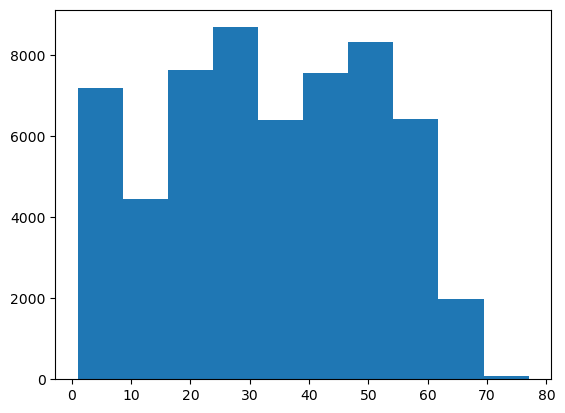

In [11]:
x_train = torch.from_numpy(X_train).to(torch.float32).to(device)

sms = model(x_train).softmax(dim=1)
print(sms[0])
prediction_sets = (sms > (1-qhat))
print(torch.sum(prediction_sets[0]))
sets = []
for i in range(sms.shape[0]):
    sets.append(torch.sum(prediction_sets[i]).to(torch.int64).item())
print(sets)
fig, ax = plt.subplots(1, 1)
# ax.fill_between(I, 0, probs)
ax.hist(sets, density=False)

In [12]:
import os
import sys
sys.path.append(os.getcwd())
import pandas as pd
import numpy as np
from numpy import linalg as LA
import heapq

key_labels = {}
#
def as_string(desc):
    return ' and '.join(desc)

def satisfies_all(desc,df,N):
    d_str = as_string(desc)
    ind = df.eval(d_str)
    cover_desc = sum(ind)
    return (cover_desc / N > 0.01 and cover_desc / N < 0.5)

class BoundedPriorityQueue:
    """
    Ensures uniqness
    Keeps a maximum size (throws away value with least quality)
    """

    def __init__(self, bound, df):
        self.values = []
        self.bound = bound
        self.entry_count = 0
        self.df = df

    def desc_intersect(self, desc1, coverage, desc2, c):
        ind_new = self.df.eval(as_string(desc1))
        ind_old = self.df.eval(as_string(desc2))
        if coverage*0.9 > c:
            return False
        if (ind_new & ind_old).sum() > c*0.8:
            return True
        return False

    def add(self, element, quality, coverage):
        if any((e == element for (_, _, e, _) in self.values)):
            return  # avoid duplicates

        # if any((self.desc_intersect(element, coverage, e, c) for (_,_,e,c) in self.values)):
        #     return        

        new_entry = (quality, self.entry_count, element, coverage)
        if (len(self.values) >= self.bound):
            temp=heapq.heappushpop(self.values, new_entry)
        else:
            heapq.heappush(self.values, new_entry)

        self.entry_count += 1

    def get_values(self):
        for (q, _, e, coverage) in sorted(self.values, reverse=True):
            yield (e, q, coverage)

    def out_vectors(self):
        return [q for (q, _, _, _) in sorted(self.values, reverse=True)]

    def show_contents(self):  # for debugging
        print("show_contents")
        for (q, entry_count, e, coverage) in self.values:
            # print(q, entry_count, e)
            print("quality: %f, entry: %d, element: %s, coverage: %f" % (q, entry_count, e, coverage))

#
class Queue:
    """
    Ensures uniqness
    """

    def __init__(self):
        self.items = []

    def is_empty(self):
        return self.items == []

    def enqueue(self, item):
        if item not in self.items:
            self.items.insert(0, item)

    def dequeue(self):
        return self.items.pop()

    def size(self):
        return len(self.items)

    def get_values(self):
        return self.items

    def add_all(self, iterable):
        for item in iterable:
            self.enqueue(item)

    def clear(self):
        self.items.clear()

In [15]:
def refine(desc, more):
    copy = desc[:]
    copy.append(more)
    return copy

def eta(seed,fs,df):
    for f in fs:
        column_data = df[f]
        if (df[f].dtype == 'float32'):
            min_val, max_val = min(column_data), max(column_data)
            for x in np.linspace(min_val, max_val, 10):
                candidate = "{} <= {value:.3f}".format(f, value=x)
                if not candidate in seed: # if not already there
                    yield refine(seed, candidate)
                candidate = "{} > {value:.3f}".format(f, value=x)
                if not candidate in seed: # if not already there
                    yield refine(seed, candidate)
        elif (df[f].dtype == 'object'):
            uniq = column_data.dropna().unique()
            for i in uniq:
                candidate = "{} == '{}'".format(f, i)
                if not candidate in seed: # if not already there
                    yield refine(seed, candidate)
                candidate = "{} != '{}'".format(f, i)
                if not candidate in seed: # if not already there
                    yield refine(seed, candidate)
        elif (df[f].dtype == 'int64'):
            min_val, max_val = min(column_data), max(column_data)
            for x in np.linspace(min_val, max_val, 10):
                candidate = "{} <= {}".format(f, np.floor(x))
                if not candidate in seed: # if not already there
                    yield refine(seed, candidate)
                candidate = "{} > {}".format(f, np.floor(x))
                if not candidate in seed: # if not already there
                    yield refine(seed, candidate)
        elif (df[f].dtype == 'bool'):
            uniq = column_data.dropna().unique()
            for i in uniq:
                candidate = "{} == '{}'".format(f, i)
                if not candidate in seed: # if not already there
                    yield refine(seed, candidate)
                candidate = "{} != '{}'".format(f, i)
                if not candidate in seed: # if not already there
                    yield refine(seed, candidate)                    
        else:
            assert False

def varphi_ent(d,n):
    return np.sqrt(-(d/n)*np.log2(d/n) - ((n-d)/n)*np.log2((n-d)/n))

def eval_quality(desc, model, df, mu_omega):
    d_str = as_string(desc)
    ind = df.eval(d_str)
    df_sd = df.loc[ind]
    
    x_sd = df_sd.values[:, :-1].astype(np.float32)
    x_sd = torch.from_numpy(x_sd).to(torch.float32).to(device)
    sms = model(x_sd).softmax(dim=1)
    predictions_sets = (sms > 1-qhat)
    sets_sd = []
    for i in range(sms.shape[0]):
        sets_sd.append(torch.sum(predictions_sets[i]).to(torch.int64).item())
    mu_sd = np.mean(sets_sd)
    quality = mu_sd - mu_omega
    # quality = mu_omega - mu_sd

    coverage = sum(ind) / df.shape[0]
    # ent = varphi_ent(sum(ind), df.shape[0])
    return quality, coverage

def EMM(df, fs, model, w, d, q, eta, satisfies_all, eval_quality):
    """
    w - width of beam
    d - num levels
    q - max results
    eta - a function that receives a description and returns all possible refinements
    satisfies_all - a function that receives a description and verifies wheather it satisfies some requirements as needed
    eval_quality - returns a quality for a given description. This should be comparable to qualities of other descriptions
    catch_all_description - the equivalent of True, or all, as that the whole dataset shall match
    """
    N = df.shape[0]

    x_omega = df.values[:, :-1].astype(np.float32)
    x_omega = torch.from_numpy(x_omega).to(torch.float32).to(device)
    sms = model(x_omega).softmax(dim=1)
    # print(sms[0])
    prediction_sets = (sms > (1-qhat))
    # print(torch.sum(prediction_sets[0]))
    sets_omega = []
    for i in range(sms.shape[0]):
        sets_omega.append(torch.sum(prediction_sets[i]).to(torch.int64).item())
    # print(sets)
    mu_omega = np.mean(sets_omega)
    print('mu omega: %f' % mu_omega)
                
    resultSet = BoundedPriorityQueue(q,df)
    candidateQueue = Queue()
    candidateQueue.enqueue([])
    for level in range(d):
        print("level : %d" % level)
        beam = BoundedPriorityQueue(w,df)
        for seed in candidateQueue.get_values():
            print("seed : %s" % str(seed))
            for desc in eta(seed, fs, df):
                if satisfies_all(desc,df,N):
                    quality, coverage = eval_quality(desc, model, df, mu_omega)
                    resultSet.add(desc, quality, coverage)
                    beam.add(desc, quality, coverage)
        beam.show_contents()
        #candidateQueue.clear()
        candidateQueue = Queue()
        candidateQueue.add_all(desc for (desc, _, _) in beam.get_values())
    return resultSet

In [16]:
features = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27']

print("features: %s" % features)

# dff = df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']]
dff = Train[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'target']]
dff = dff.astype(np.float32)

EMM_res = EMM(df=dff, fs=features, model=model, w=20, d=2, q=10, eta=eta, satisfies_all=satisfies_all, eval_quality=eval_quality)

for (desc, quality, coverage) in EMM_res.get_values():
	print("{};{};{}\n".format(desc,quality,coverage))

features: ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27']
mu omega: 33.277115
level : 0
seed : []
show_contents
quality: 6.405023, entry: 106, element: ['V19 <= 55.854'], coverage: 0.164871
quality: 7.286557, entry: 50, element: ['V8 > 0.064'], coverage: 0.283455
quality: 6.967032, entry: 23, element: ['V4 <= 0.231'], coverage: 0.137586
quality: 8.302862, entry: 104, element: ['V19 <= 33.781'], coverage: 0.014810
quality: 8.194364, entry: 9, element: ['V2 <= 0.451'], coverage: 0.478049
quality: 7.386284, entry: 76, element: ['V12 <= 28.554'], coverage: 0.046936
quality: 7.199805, entry: 14, element: ['V3 <= 0.124'], coverage: 0.101166
quality: 9.434594, entry: 105, element: ['V19 <= 44.817'], coverage: 0.053855
quality: 9.142764, entry: 8, element: ['V2 <= 0.342'], coverage: 0.389904
quality: 8.283636, entry: 39, element: ['V6 <= 0.371'], coverage: 0.4603

['V11 <= 28.576', 'V2 <= 0.342'];17.82021832890222;0.012782057399959098

750
['V2 <= 0.342', 'V11 <= 28.576'];17.82021832890222;0.012782057399959098

750
['V11 <= 28.576', 'V6 <= 0.371'];17.2766233133259;0.014588588179153317

856
['V6 <= 0.371', 'V11 <= 28.576'];17.2766233133259;0.014588588179153317

856
['V2 <= 0.122', 'V10 <= 56.849'];17.27155756194057;0.013480809871156862

791
15338


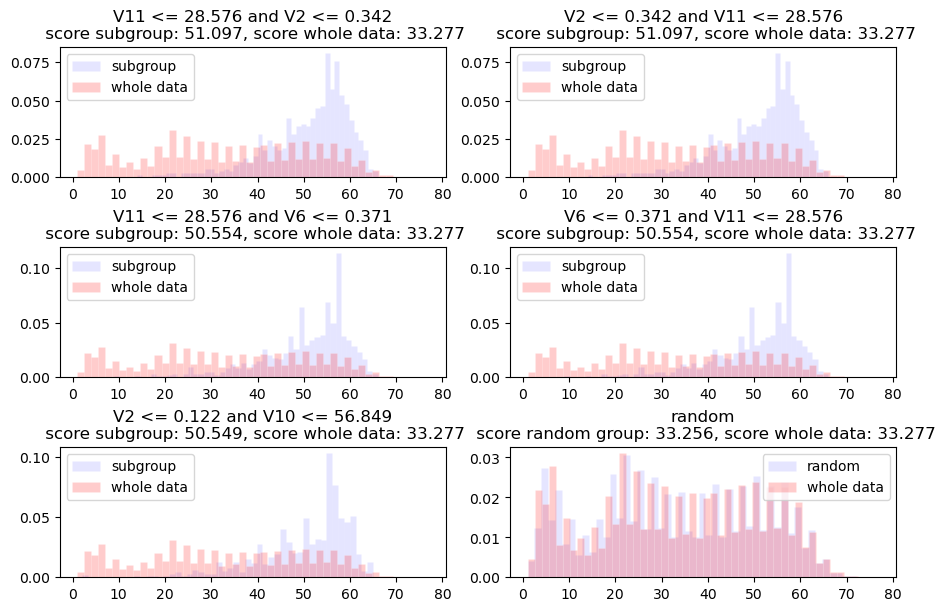

In [17]:
N_dff = dff.shape[0]

x_omega = dff.values[:, :-1].astype(np.float32)
x_omega = torch.from_numpy(x_omega).to(torch.float32).to(device)
sms = model(x_omega).softmax(dim=1)
# print(sms[0])
prediction_sets = (sms > (1-qhat))
# print(torch.sum(prediction_sets[0]))
sets_omega = []
for i in range(sms.shape[0]):
    sets_omega.append(torch.sum(prediction_sets[i]).to(torch.int64).item())

k = 0
q = 5
fig, axs = plt.subplots(3, 2, figsize=(9, 6), layout='constrained')

for (desc, quality, coverage) in EMM_res.get_values():
	print("{};{};{}\n".format(desc, quality, coverage))
	d_str = as_string(desc)
	ind = dff.eval(d_str)
	df_sd = dff.loc[ind]

	x_sd = df_sd.values[:, :-1].astype(np.float32)
	x_sd = torch.from_numpy(x_sd).to(torch.float32).to(device)
	sms = model(x_sd).softmax(dim=1)
	predictions_sets = (sms > 1-qhat)
	sets_sd = []
	for i in range(sms.shape[0]):
		sets_sd.append(torch.sum(predictions_sets[i]).to(torch.int64).item())
	print(len(sets_sd))

	ax = axs.flat[k]
	if ax is None:
		ax = plt.gca()

	preds_sd = sets_sd
	preds_wd = sets_omega
	ax.hist(preds_sd, linewidth=0.5, bins=50, edgecolor="white", color='b', alpha=0.1, label='subgroup', density=True)
	ax.hist(preds_wd, linewidth=0.5, bins=50, edgecolor="white", color='r', alpha=0.2, label='whole data', density=True)
	score_sd = np.mean(sets_sd)
	score_all = np.mean(sets_omega)
	ax.set_title(f'{d_str}\n score subgroup: {(score_sd):<0.3f}, score whole data: {(score_all):<0.3f}')
	ax.legend()
	k += 1
	if k == 5:
		break

inds_rand = np.random.permutation(N_dff)
flag = np.random.randint(np.int32(0.2*N_dff), np.int32(0.5*N_dff))
inds_rand = inds_rand[:flag]
inputs = dff.iloc[inds_rand]

x_rand = inputs.values[:, :-1].astype(np.float32)
x_rand = torch.from_numpy(x_rand).to(torch.float32).to(device)
sms = model(x_rand).softmax(dim=1)
predictions_sets = (sms > 1-qhat)
sets_rand = []
for i in range(sms.shape[0]):
	sets_rand.append(torch.sum(predictions_sets[i]).to(torch.int64).item())
print(len(sets_rand))
ax = axs.flat[k]
preds_sd = sets_rand
preds_wd = sets_omega
ax.hist(preds_sd, linewidth=0.5, bins=50, edgecolor="white", color='b', alpha=0.1, label='random', density=True)
ax.hist(preds_wd, linewidth=0.5, bins=50, edgecolor="white", color='r', alpha=0.2, label='whole data', density=True)
score_sd = np.mean(sets_rand)
score_all = np.mean(sets_omega)
ax.set_title(f'{'random'}\n score random group: {(score_sd):<0.3f}, score whole data: {(score_all):<0.3f}')
ax.legend()